# Atividade 2 - Classificação com KNN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [133]:
df = pd.read_csv('water_potability_nonans.csv')
columns = df.columns
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
2006   8.989900  215.047358  15921.412018     6.297312  312.931022   
2007   6.702547  207.321086  17246.920347     7.708117  304.510230   
2008  11.491011   94.812545  37188.826022     9.263166  258.930600   
2009   6.069616  186.659040  26138.780191     7.747547  345.700257   
2010   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2006    390.410231        9.899115        55.069304   4.613843           1  
2007    329.266002       16.217303        28.878601   3.442983           1  
2008    439.893618       16.172755        41.558501   4.369264           1  
2009    415.886955       12.067620        60.419921   3.669712           1  
2010    526.424171       13.894419        66.687695   4.435821           1

In [134]:
pd.set_option('display.max_columns', None)
df.groupby('Potability').describe()

ph                                                    \
             count      mean       std       min       25%       50%   
Potability                                                             
0           1200.0  7.067201  1.659106  1.431782  5.982888  6.992004   
1            811.0  7.113791  1.437623  0.227499  6.256039  7.046549   

                                Hardness                                    \
                 75%        max    count        mean        std        min   
Potability                                                                   
0           8.141979  14.000000   1200.0  196.008440  30.717642  98.452931   
1           7.955161  11.898078    811.0  195.908341  35.301146  73.492234   

                                                            Solids  \
                   25%         50%         75%         max   count   
Potability                                                           
0           177.313440  196.799368  214.532109  300.292476  1200.0   
1           174.380497  197.617494  218.414531  317.338124   811.0   

                                                                  \
                    mean          std          min           25%   
Potability                                                         
0           21628.535122  8461.108693   320.942611  15378.907323   
1           22344.922883  8891.547966  1198.943699  15816.076607   

                                                     Chloramines            \
                     50%           75%           max       count      mean   
Potability                                                                   
0           20507.399647  26786.546213  55334.702799      1200.0  7.107267   
1           21217.158596  27696.134419  56488.672413       811.0  7.174395   

                                                                         \
                 std       min       25%       50%       75%        max   
Potability                                                                
0           1.476577  2.456014  6.169384  7.103718  8.076759  12.653362   
1           1.732796  1.390871  6.106169  7.212254  8.181431  13.127000   

           Sulfate                                                             \
             count        mean        std         min         25%         50%   
Potability                                                                      
0           1200.0  333.742928  36.398403  203.444521  310.653441  332.615625   
1            811.0  332.457832  47.446190  129.000000  301.768819  331.087177   

                                   Conductivity                         \
                   75%         max        count        mean        std   
Potability                                                               
0           356.432048  460.107069       1200.0  427.554342  79.882677   
1           365.632984  481.030642        811.0  425.005423  81.950982   

                                                                        \
                   min         25%         50%         75%         max   
Potability                                                               
0           210.319182  369.580980  424.479471  482.333786  753.342620   
1           201.619737  360.275012  421.099917  482.296528  695.369528   

           Organic_carbon                                            \
                    count       mean       std       min        25%   
Potability                                                            
0                  1200.0  14.400250  3.370196  4.371899  12.118659   
1                   811.0  14.294764  3.257917  2.200000  12.148355   

                                            Trihalomethanes             \
                  50%        75%        max           count       mean   
Potability                                                               
0           14.351828  16.787531  27.006707          1200.0  66.278712   
1    

# Explorando Dataset
Abaixo estão algumas visualizações com o objetivo de verificar a separabilidade do nosso dataset, e como será possível perceber abaixo, nenhum dos atributos é muito bom para utilizar para classificar nossa classe de potabilidade ('Potability').

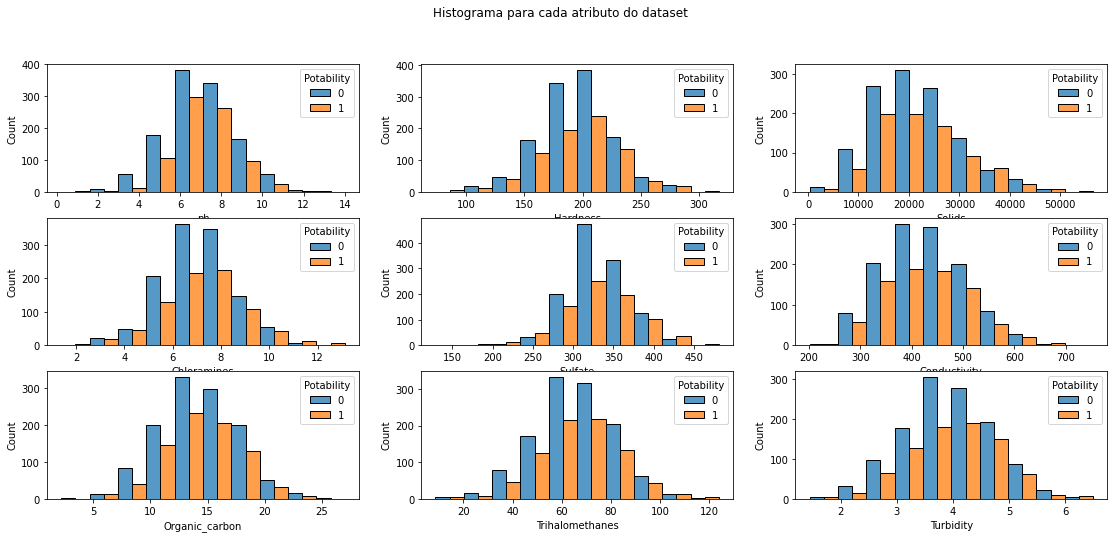

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(19,8))
fig.suptitle('Histograma para cada atributo do dataset')

sns.histplot(data=df, bins=10, x='ph', hue='Potability', multiple='dodge', ax=axes[0][0])
sns.histplot(data=df, bins=10, x='Hardness', hue='Potability', multiple='dodge', ax=axes[0][1])
sns.histplot(data=df, bins=10, x='Solids', hue='Potability', multiple='dodge', ax=axes[0][2])
sns.histplot(data=df, bins=10, x='Chloramines', hue='Potability', multiple='dodge', ax=axes[1][0])
sns.histplot(data=df, bins=10, x='Sulfate', hue='Potability', multiple='dodge', ax=axes[1][1])
sns.histplot(data=df, bins=10, x='Conductivity', hue='Potability', multiple='dodge', ax=axes[1][2])
sns.histplot(data=df, bins=10, x='Organic_carbon', hue='Potability', multiple='dodge', ax=axes[2][0])
sns.histplot(data=df, bins=10, x='Trihalomethanes', hue='Potability', multiple='dodge', ax=axes[2][1])
sns.histplot(data=df, bins=10, x='Turbidity', hue='Potability', multiple='dodge', ax=axes[2][2])

plt.show()

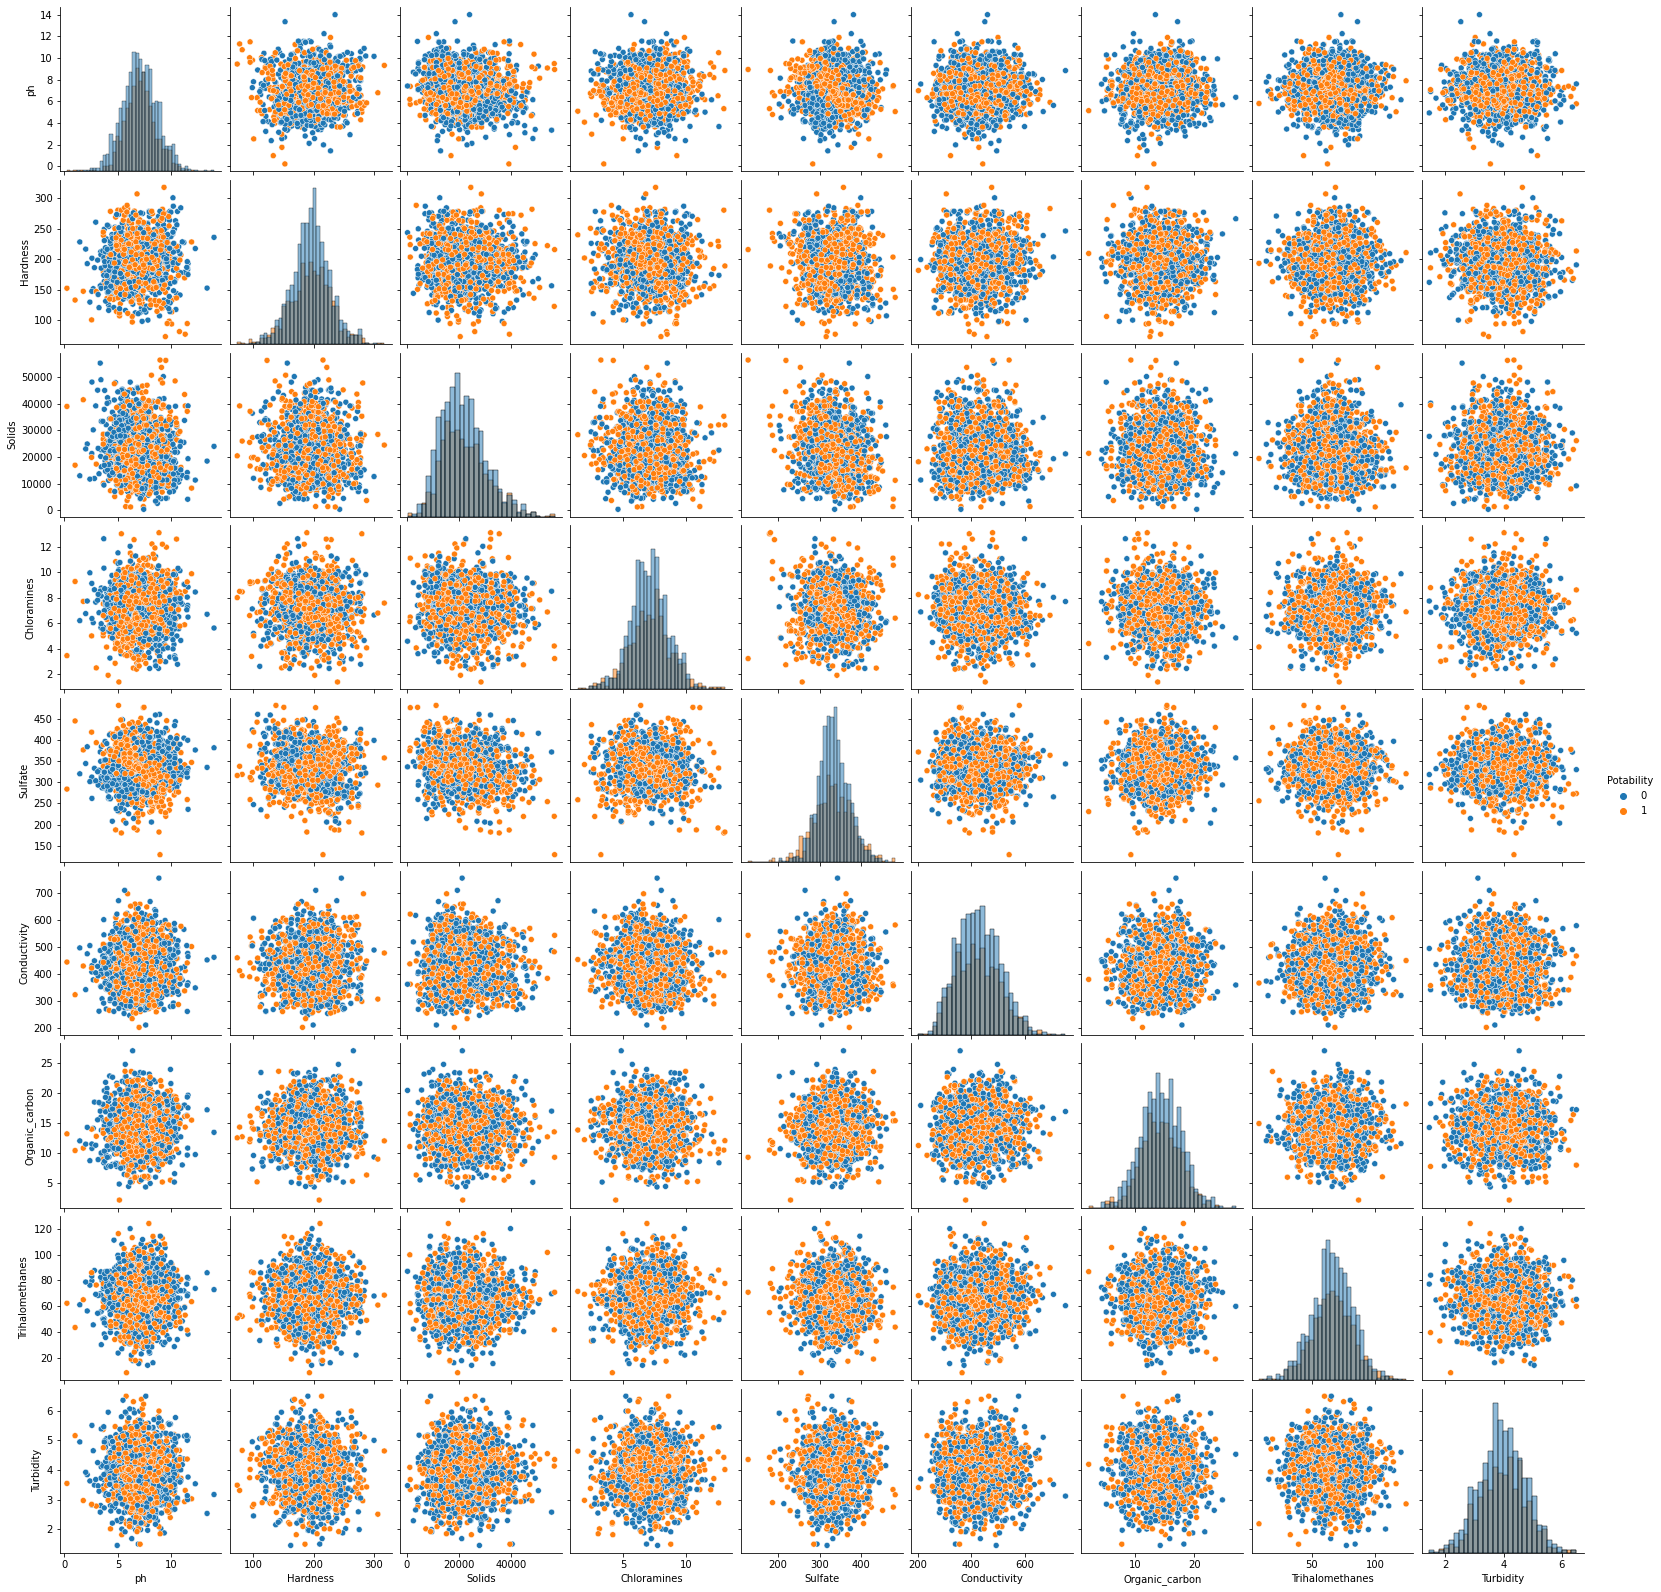

In [39]:
sns.pairplot(data=df, hue='Potability', diag_kind='hist')

# Utilizando PCA
Como há um grande de dimensões no nosso dataset, e a separabilidade não é muito boa, utilizarei o PCA para realizar uma diminuição de dimensionalidade, verificando em seguida como ficou o espaço formado.

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Normalizando os dados

In [168]:
# Normaliza os dados
X = df.loc[:, df.columns != 'Potability']
y_values = df['Potability'].values

# instancia o Stand Scaler
ss = StandardScaler()

ss.fit(X)

X_ss = ss.transform(X)
X_ss = pd.DataFrame( np.hstack((X, df['Potability'].values.reshape((-1,1)) )), columns=columns  )
X_ss.tail()
# sns.pairplot(data=X, hue='Potability')

KeyError: 0

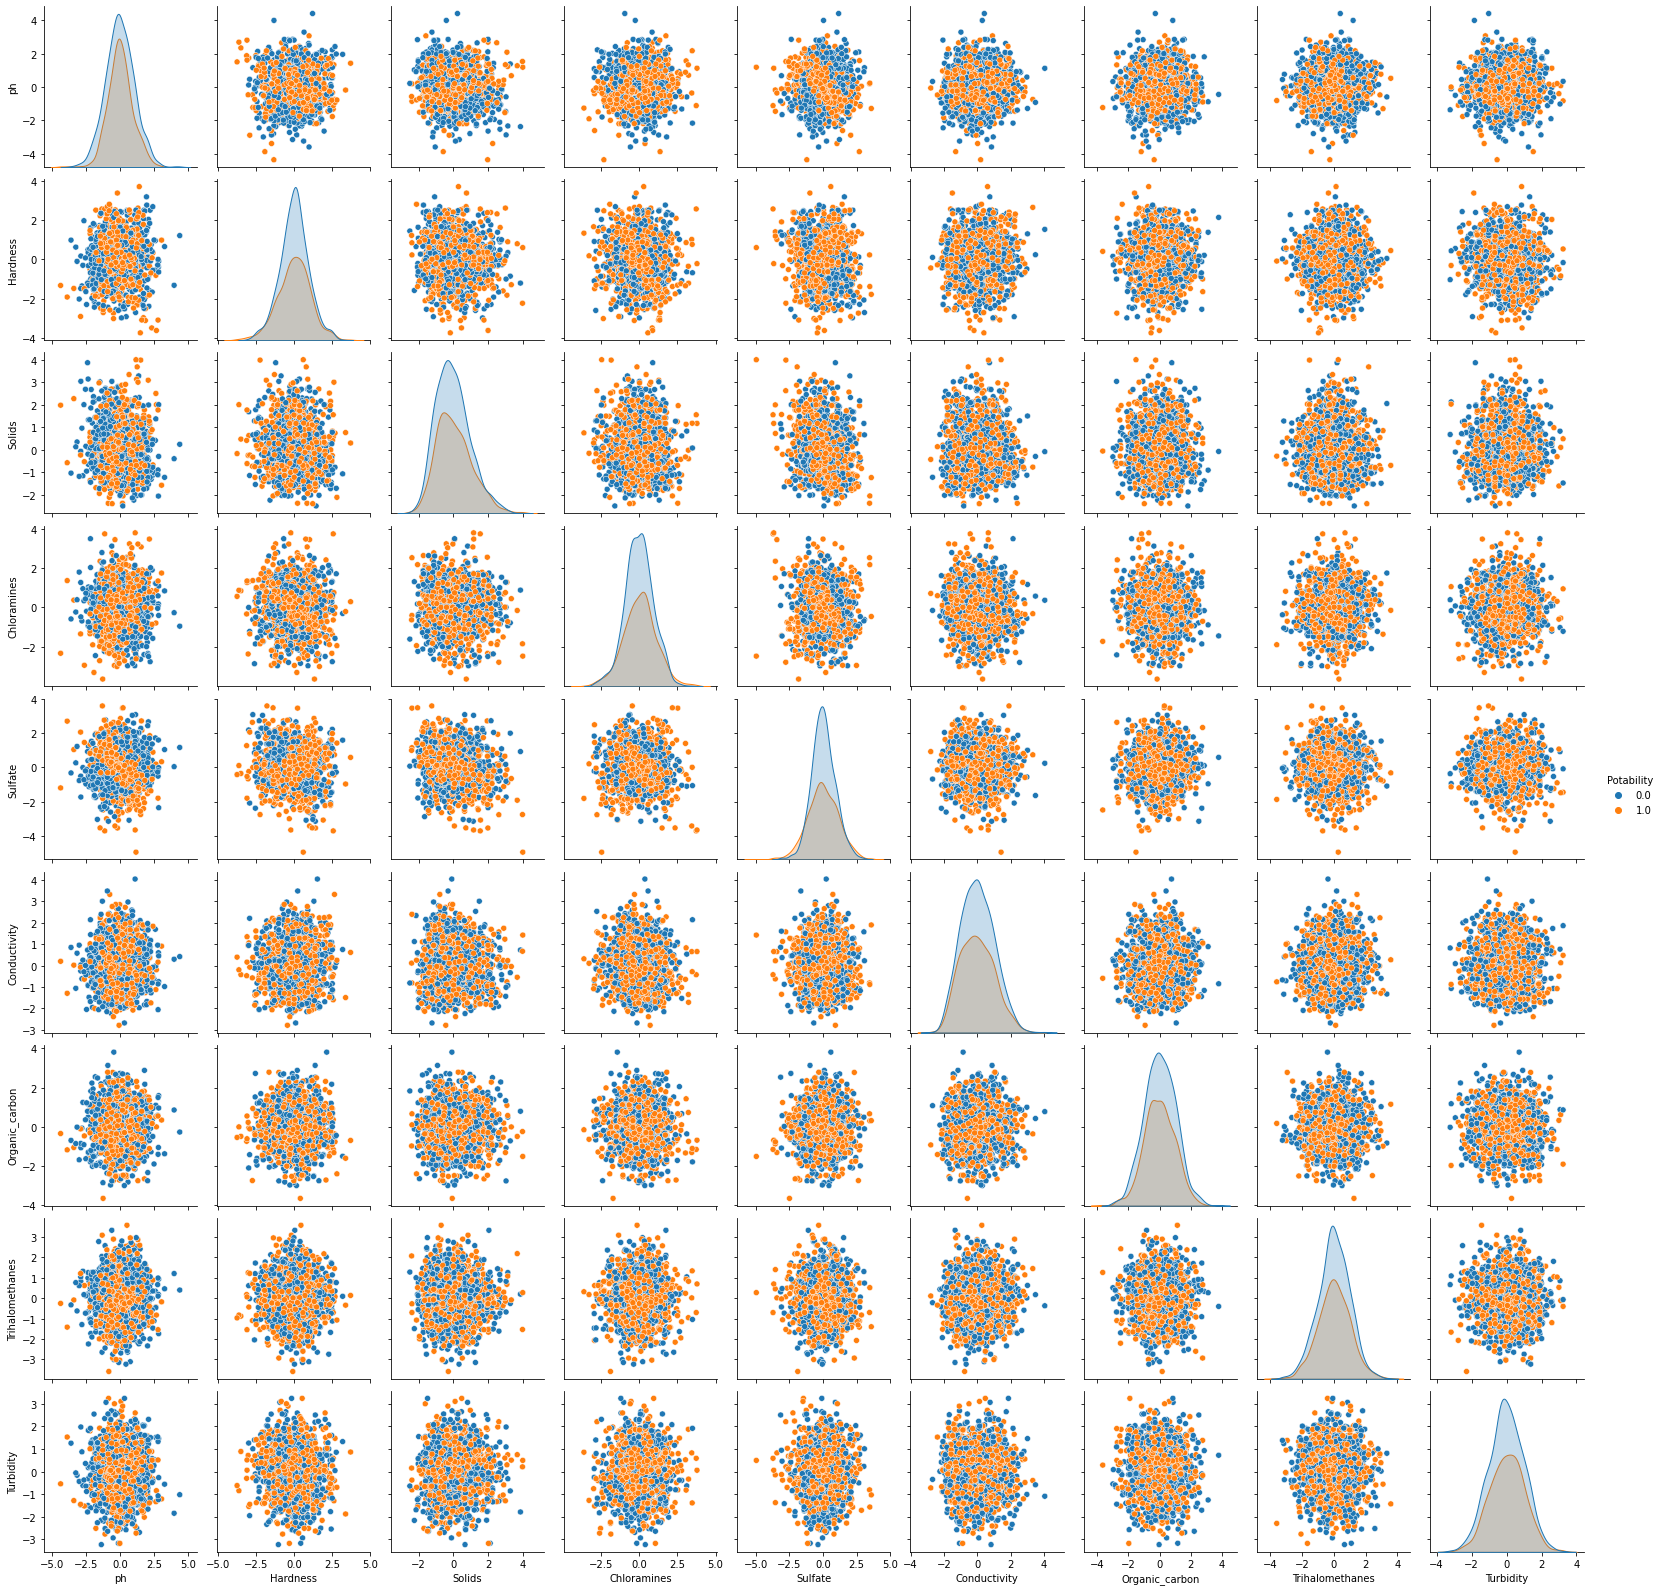

In [87]:
sns.pairplot(data=X, hue='Potability')

In [143]:

y_values = X_ss['Potability'].values
X_df = X_ss.loc[:, X_ss.columns != 'Potability']
X_df
# instancia o PCA
pca = PCA(n_components=2)
pca.fit(X_df)

# # Projeta 9 atributos nos 2 componentes principais
X_pca = pca.transform(X_df)
X_pca = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1'])
X_pca

sns.scatterplot(data=X_pca, x='PC 0', y='PC 1', hue=df['Potability'])

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

# Validação cruzada em dois níveis

In [130]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [205]:
def retorna_melhor_k(valores_k, X_treino, y_treino, X_val, y_val):
    acuracias_k = []
    melhor_acuracia = 0
    # Para todo k
    for k in valores_k:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Treino utilizando o conjunto de treino
        knn.fit(X_treino, y_treino)

        # Testo utilizando o conjunto de validação
        pred = knn.predict(X_val)
        acuracias_k.append( accuracy_score(y_val, pred))
    
    # Encontra melhor acuracia
    melhor_acuracia = max(acuracias_k)
    melhor_k = valores_k[np.argmax(acuracias_k)]

    # Depois instancia o knn e testa para o conjunto de treino e validação
    knn = KNeighborsClassifier(n_neighbors=melhor_k)
    knn.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])

    return knn, melhor_k, melhor_acuracia

In [208]:
# Serão utilizadas 10 vias no primeiro nível da validação cruzada
k_vias_primeiro_nivel = 10
acuracias_folds = []
# X = X.values


skf = StratifiedKFold(n_splits=k_vias_primeiro_nivel, shuffle=True, random_state=1)
# y = pd.DataFrame(y_values, index=range(0, len(y_values), 1), columns=['Potability'])

# Pego as instancias de cada fold
for treino_idx, teste_idx in skf.split(X, y_values):
    
    # Pega as instancias de treinamento
    X_treino = X[treino_idx]
    y_treino = y_values[treino_idx]

    # Pega as instancias de teste
    X_teste = X[teste_idx]
    y_teste = y_values[teste_idx]
    
    # Separar o conjunto de treino em trainamento de validação
    X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, stratify=y_treino, shuffle=True, random_state=1)
    
    # Realiza normalização utilizando o conjunto de trainamento
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_val = ss.transform(X_val)
    X_teste = ss.transform(X_teste)

    knn, melhor_k, melhor_acuracia = retorna_melhor_k(range(1, 50, 2), X_treino, y_treino, X_val, y_val)
    acuracias_folds.append(melhor_acuracia)

print("A melhor acuracia encontrada foi de %.2f" % (max(acuracias_folds)))

A melhor acuracia encontrada foi de 0.69
